<a href="https://colab.research.google.com/github/Adukemi/OASIS_INFOBYTE/blob/main/Project4_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 4, Level 1**

# **Sentiment Analysis**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df_user = pd.read_csv('/content/user_reviews.csv')
df_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [12]:
df_user.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [13]:
# Drop rows with NaN values in 'Translated_Review' and 'Sentiment' columns
df_user = df_user.dropna(subset=['Translated_Review', 'Sentiment'])

df_user.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


In [14]:
df_user.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


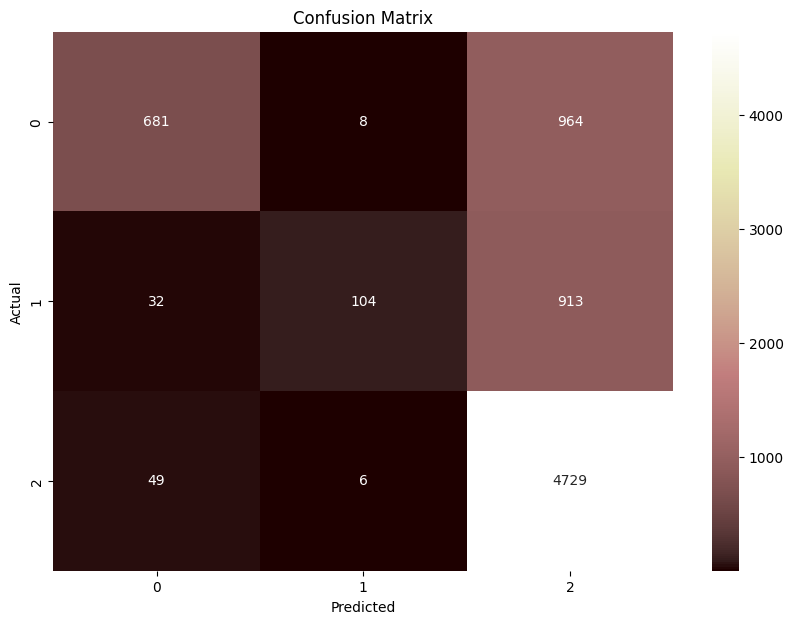




              precision    recall  f1-score   support

    Negative       0.89      0.41      0.56      1653
     Neutral       0.88      0.10      0.18      1049
    Positive       0.72      0.99      0.83      4784

    accuracy                           0.74      7486
   macro avg       0.83      0.50      0.52      7486
weighted avg       0.78      0.74      0.68      7486



In [17]:
# Preprocessing: splitting data
X_train, X_test, y_train, y_test = train_test_split(df_user['Translated_Review'], df_user['Sentiment'], test_size=0.2, random_state=42)

# Transforming text data
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_tfidf)
classification_report_result = classification_report(y_test, y_pred)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\n\n")
print(classification_report_result)

# **Derived Insight:**

1. The model overall accuracy is 74%, indicating moderate performance.
2. Class Performance:
  - Negative Sentiment (0):
          Precision: 89% (low false positives).
          Recall: 41% (misses most negative samples).
  - Neutral Sentiment (1):
          Precision: 88%, but recall is extremely low at 10%, suggesting the model struggles to identify Neutral samples.
  - Positive Sentiment (2):
          High precision (72%) and excellent recall (99%), meaning most Positive samples are correctly identified.
3. Misclassification Trends:
    Negative and Neutral sentiments are often misclassified as Positive, reflecting class imbalance and overlap in sentiment expressions.
    Neutral class has the lowest F1-score (0.18), indicating poor performance.


# **Recommendations:**
1. Apply oversampling or undersampling techniques, or use class weights in the model to prioritize Negative and Neutral classes.
2. Incorporate advanced embeddings (e.g., BERT or TF-IDF) to better capture semantic differences among classes.
3. Fine-tune pre-trained transformer-based models (e.g., BERT) for nuanced text understanding. Experiment with ensemble models to reduce misclassification.
4. Investigate examples misclassified as Positive to identify patterns or features leading to confusion.
5. Consider increasing the training data for Neutral samples or adding features (e.g., context-specific words or sentiment dictionaries) that differentiate Neutral sentiment.

Improving recall for the Negative and Neutral classes while balancing precision across all classes will significantly enhance the model's overall performance.








In [19]:
# Load the Twitter data
df_twitter = pd.read_csv("/content/Twitter_Data.csv")

df_twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [20]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [24]:
# checking for missing data

df_twitter.isnull().sum()

,0
clean_text,0
category,0


In [27]:
# dropping and recheck for missing data

df_twitter.dropna(subset=['clean_text', 'category'], inplace=True)
df_twitter.isnull().sum()

,0
clean_text,0
category,0


              precision    recall  f1-score   support

          -1       0.91      0.42      0.57      7152
           0       0.88      0.66      0.76     11067
           1       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



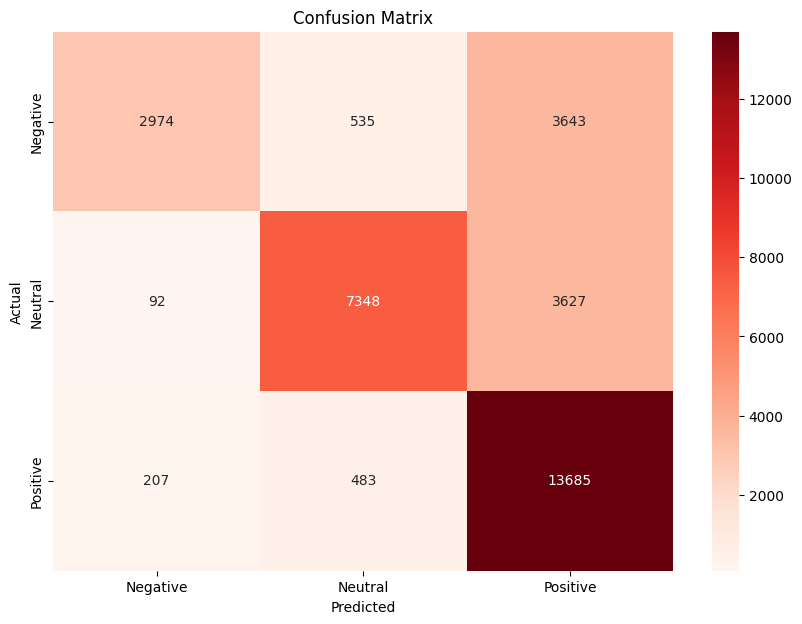

In [28]:
# Preprocess the data
df_twitter['category'] = df_twitter['category'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_twitter['clean_text'], df_twitter['category'], test_size=0.2, random_state=42)

# Feature Engineering: Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Implementing a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_tfidf)

# Evaluating the model
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Data Visualization: Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Insights:

1. This model achieves a 74% accuracy, with strong recall for Positive sentiment (95%) but low recall for Negative sentiment (42%).
2. Negative sentiments are often misclassified as Positive, and Neutral sentiments are confused with both Negative and Positive.
3. The imbalance in class distribution (more Positive samples) likely skews the performance, favoring the Positive class at the expense of others.

# Recommendations:
1. Use techniques like oversampling, undersampling, or weighted classes to balance predictions.
2. Incorporate advanced NLP embeddings (e.g., BERT) and additional features like polarity scores.
3. Fine-tune pre-trained models or use ensemble methods for better sentiment classification.
4. Examine misclassified samples to improve handling of ambiguous or nuanced language.
5. Deploy the model with real-time feedback loops to refine performance post-deployment.

These steps can enhance the model's ability to correctly classify Negative and Neutral sentiments while maintaining overall performance.